In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat=loadmat("ex5data1.mat")
#Training set
X, y = mat['X'], mat['y']
#Cross validation set
Xval, yval = mat['Xval'], mat['yval']
#Test set
Xtest, ytest = mat['Xtest'], mat['ytest']

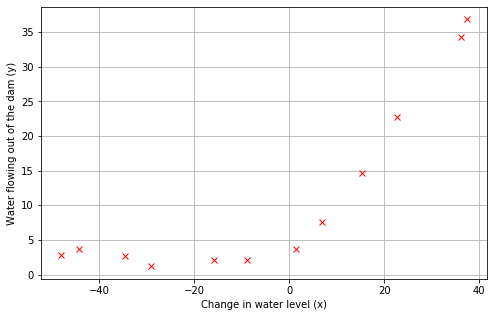

In [3]:
def plotData():
    plt.figure(figsize=(8,5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,0],y,'rx')
    plt.grid(True)
    
plotData()

In [4]:
def feature_scaling(X):
    mean_X= np.mean(X,axis=0)
    min_X=np.amin(X,axis=0)
    max_X=np.amax(X,axis=0)
    X=(X-mean_X)/(max_X-min_X)
    return X

X = feature_scaling(X)
Xval=feature_scaling(Xval)
print (X)

[[-0.12684048]
 [-0.28132398]
 [ 0.48246037]
 [ 0.49768682]
 [-0.50231318]
 [-0.04507289]
 [ 0.23837495]
 [-0.34623597]
 [ 0.07568093]
 [-0.45935554]
 [ 0.14142355]
 [ 0.32551542]]


In [5]:
X =     np.insert(X    ,0,1,axis=1)
Xval =  np.insert(Xval ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)

# Compute the Regularized Linear Regression Cost Function


$J(\Theta) = \frac{1}{2m} (\sum_{i=1}^m(h_\Theta(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m}(\sum_{j=1}^n \Theta_j^2)$

In [6]:
def h(mytheta,myX): #Linear hypothesis function
    return np.dot(myX,mytheta)

def computeCost(mytheta,myX,myy,mylambda=0.): #Cost function
    m = myX.shape[0]
    myh = h(mytheta,myX).reshape((m,1))
    mycost = float((1./(2*m)) * np.dot((myh-myy).T,(myh-myy)))
    regterm = (float(mylambda)/(2*m)) * float(mytheta[1:].T.dot(mytheta[1:]))
    return mycost + regterm

# Regularized linear regression gradient



In [7]:
def computeGradient(mytheta,myX,myy,mylambda=0.):
    mytheta = mytheta.reshape((mytheta.shape[0],1))
    m = myX.shape[0]
    myh = h(mytheta,myX).reshape((m,1))
    grad = (1./float(m))*myX.T.dot(h(mytheta,myX)-myy)
    regterm = (float(mylambda)/m)*mytheta
    regterm[0] = 0 
    regterm.reshape((grad.shape[0],1))
    return grad + regterm

#Here's a wrapper for computeGradient that flattens the output
#This is for the minimization routine that wants everything flattened
def computeGradientFlattened(mytheta,myX,myy,mylambda):
    return computeGradient(mytheta,myX,myy,mylambda).flatten()

In [8]:
def gradientDescent(mytheta,myX,myy,mylambda, learning_rate, num_iterations,J):
    for i in range(0, num_iterations):
        cost= computeCost(mytheta,myX,y,mylambda)
        mytheta = mytheta - learning_rate*computeGradient(mytheta,myX,myy,mylambda)
        J.append(cost)
    return mytheta,J

In [9]:
%%time
theta = np.ones(shape=(X.shape[1],1))
print (theta.shape)
num_iterations=10000
learning_rate=0.01
mylambda=0.0
J_history =[]
theta,J_history = gradientDescent(theta,X,y,mylambda,learning_rate, num_iterations,J_history)

(2, 1)
Wall time: 337 ms


In [10]:
#%%time
#theta = np.ones(shape=(X.shape[1],1))
#num_iterations=50000
#learning_rate=0.01
#mylambda=0.0
#J_history =[]
#for i in range(0, num_iterations):
#        cost= computeCost(theta,X,y,mylambda)
#        theta = theta - learning_rate*computeGradient(theta,X,y,mylambda)
 #       J_history.append(cost)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

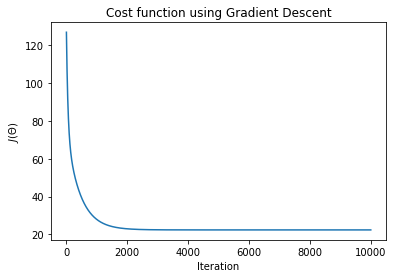

In [11]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [12]:
mat=loadmat("ex5data1.mat")
X_unchanged, y = mat['X'], mat['y']
print(X_unchanged.shape)
print (theta.shape)

(12, 1)
(2, 1)


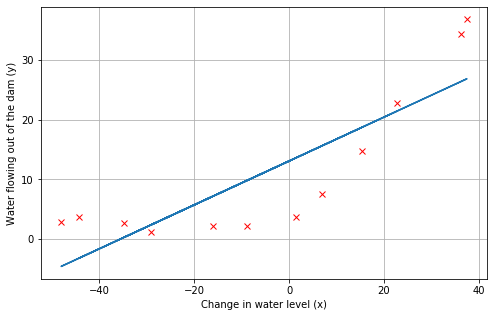

In [13]:
plt.figure(figsize=(8,5))
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.plot(X_unchanged[:,0],y,'rx')
plt.grid(True)
plt.plot(X_unchanged[:,0],h(theta,X))

# Learning curves


In [14]:
def gradientDescent_curves(mytheta,myX,myy,mylambda, learning_rate, num_iterations):
    for i in range(0, num_iterations):
        #cost= computeCost(mytheta,X,y,mylambda)
        mytheta = mytheta - learning_rate*computeGradient(mytheta,myX,myy,mylambda)
    return mytheta

In [15]:
%%time
#theta = np.ones(shape=(X.shape[1],1))
num_iterations=10000
learning_rate=0.01
mylambda=0.0
m=len(y)
n=X.shape[1]
J_train,J_val =[],[]
for i in range(1,m+1):
    theta = gradientDescent_curves(np.ones((n,1)),X[0:i,:],y[0:i,:],mylambda,learning_rate, num_iterations)
    cost_train=computeCost(theta,X[0:i,:],y[0:i,:],mylambda)
    cost_val= computeCost(theta,Xval[0:i,:],yval[0:i,:],mylambda)
    J_train.append(cost_train)
    J_val.append(cost_val)

Wall time: 1.59 s


Text(0.5, 1.0, 'Cost function using Gradient Descent')

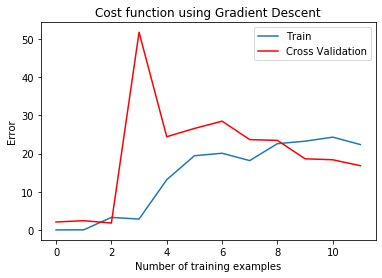

In [16]:
plt.plot(J_train,label="Train")
plt.plot(J_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.title("Cost function using Gradient Descent")

In [17]:
print (cost_train)
print (cost_val)

22.373906503908145
16.832757436514


# Polynomial regression


In [67]:
def polyFeatures(X, p):
    """
    Takes a data matrix X (size m x 1) and maps each example into its polynomial features where 
    X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    """
    for i in range(2,p+1):
        X = np.hstack((X,np.power(X[:,1],i)[:,np.newaxis]))
    
    return X

In [68]:
p=20
X_poly = polyFeatures(X, p)
X_poly_val = polyFeatures(Xval, p)
print (X_poly.shape)
print (X_poly_val.shape)

(12, 21)
(21, 21)


Wall time: 4.41 s


Text(0.5, 1.0, 'Cost function using Gradient Descent')

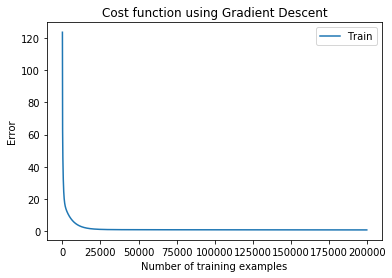

In [71]:
%%time
theta = np.ones(shape=(X_poly.shape[1],1))
num_iterations=200000
learning_rate=0.01
mylambda=0.0
J_history_poly=[]
theta,J_history_poly = gradientDescent(theta,X_poly,y,mylambda,learning_rate, num_iterations,J_history_poly)

plt.plot(J_history_poly,label="Train")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.title("Cost function using Gradient Descent")

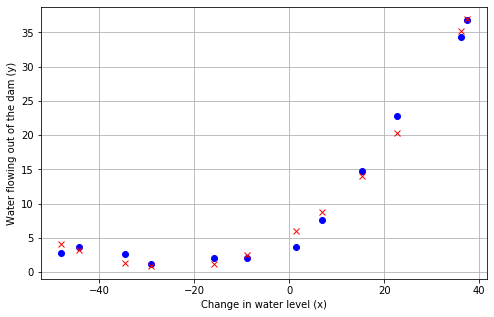

In [72]:
plt.figure(figsize=(8,5))
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.plot(X_unchanged[:,0],y,'bo')
plt.plot(X_unchanged[:,0],h(theta,X_poly),'rx')
plt.grid(True)

In [73]:
def first(a_list): return a_list[0]
def last(a_list): return a_list[-1]

print (first(J_history_poly))
print (last(J_history_poly))

123.6249071400405
0.7695010505327785


In [74]:
%%time
#theta = np.ones(shape=(X.shape[1],1))
num_iterations=100000
learning_rate=0.01
mylambda=0.0
m=len(y)
n=X_poly.shape[1]
J_train,J_val =[],[]
for i in range(1,m+1):
    theta = gradientDescent_curves(np.ones((n,1)),X_poly[0:i,:],y[0:i,:],mylambda,learning_rate, num_iterations)
    cost_train=computeCost(theta,X_poly[0:i,:],y[0:i,:],mylambda)
    cost_val= computeCost(theta,X_poly_val[0:i,:],yval[0:i,:],mylambda)
    J_train.append(cost_train)
    J_val.append(cost_val)

Wall time: 16.5 s


Text(0.5, 1.0, 'Cost function using Gradient Descent')

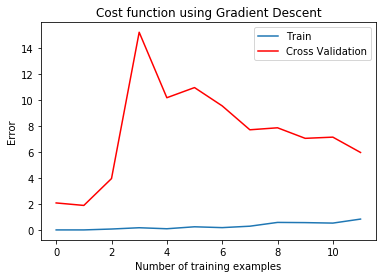

In [75]:
plt.plot(J_train,label="Train")
plt.plot(J_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.title("Cost function using Gradient Descent")

# Polynomial regression with lambda = 100


In [96]:
%%time
theta = np.ones(shape=(X_poly.shape[1],1))
num_iterations=1000000
learning_rate=0.01
mylambda=100.0
J_history_poly=[]
theta,J_history_poly = gradientDescent(theta,X_poly,y,mylambda,learning_rate, num_iterations,J_history_poly)

Wall time: 29.5 s


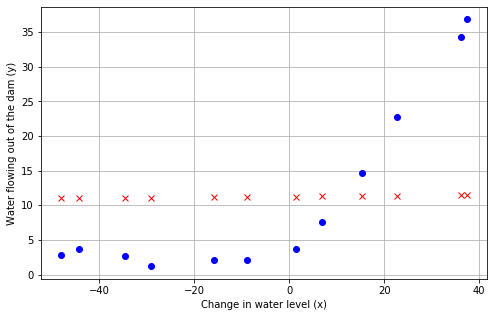

In [97]:
plt.figure(figsize=(8,5))
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.plot(X_unchanged[:,0],y,'bo')
plt.plot(X_unchanged[:,0],h(theta,X_poly),'rx')
plt.grid(True)

In [98]:
%%time
#theta = np.ones(shape=(X.shape[1],1))
num_iterations=100000
learning_rate=0.01
mylambda=100.0
m=len(y)
n=X_poly.shape[1]
J_train,J_val =[],[]
for i in range(1,m+1):
    theta = gradientDescent_curves(np.ones((n,1)),X_poly[0:i,:],y[0:i,:],mylambda,learning_rate, num_iterations)
    cost_train=computeCost(theta,X_poly[0:i,:],y[0:i,:],mylambda)
    cost_val= computeCost(theta,X_poly_val[0:i,:],yval[0:i,:],mylambda)
    J_train.append(cost_train)
    J_val.append(cost_val)

Wall time: 16.9 s


Text(0.5, 1.0, 'Cost function using Gradient Descent')

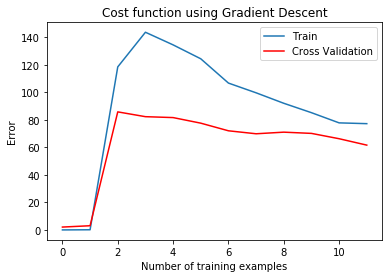

In [99]:
plt.plot(J_train,label="Train")
plt.plot(J_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.title("Cost function using Gradient Descent")

In [120]:
%%time
#theta = np.ones(shape=(X.shape[1],1))
num_iterations=100000
learning_rate=0.01
Lambda=np.array([0.0,0.5,1.0,2.0,5.0,25.0])
m=len(y)
n=X_poly.shape[1]
J_train,J_val =[],[]
for i in range(0,Lambda.size):
    mylambda= Lambda[i]
    theta = gradientDescent_curves(np.ones((n,1)),X_poly,y,mylambda,learning_rate, num_iterations)
    cost_train=computeCost(theta,X_poly,y,mylambda)
    cost_val= computeCost(theta,X_poly_val,yval,mylambda)
    J_train.append(cost_train)
    J_val.append(cost_val)

Wall time: 7.86 s


Text(0.5, 1.0, 'Cost function using Gradient Descent')

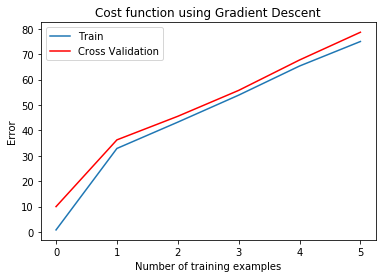

In [121]:
plt.plot(J_train,label="Train")
plt.plot(J_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.title("Cost function using Gradient Descent")